# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [3]:
# Your code here - Manipulate column names
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10-14',
       'ages_10-16', 'ages_10-21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [4]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [5]:
df.columns = [col_formatting(col) for col in df.columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [7]:
# Your code here - Define the target and predictors
y = 'list_price'
df_predictors = df.drop('list_price',axis = 1)
X = list(df_predictors.columns)

In [8]:
# Your code here - Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

7609 3261 7609 3261


In [9]:
train_df = pd.concat([y_train,X_train],axis=1)
train_df

,list_price,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
1417,24.3878,-0.577395,-0.426440,0.216064,0.990651,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10642,158.5878,1.762569,9.795146,0.390333,0.783383,1.083511,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
604,29.9900,-0.316330,0.243828,-0.481010,-0.045687,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1272,60.9878,-0.241740,-0.398512,0.216064,-1.082024,-2.779212,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4797,21.6000,-0.376483,-0.426440,-0.655279,0.990651,-1.974478,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,15.7990,-0.511227,-0.398512,-1.526621,-2.118362,-1.974478,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5191,24.3878,-0.337985,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5390,19.5078,-0.489572,-0.063378,-0.306741,-0.874757,-0.204063,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
860,37.9924,-0.253771,-0.147162,0.913138,0.368848,0.600671,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
test_df = pd.concat([y_test,X_test],axis=1)

In [11]:
# Your code here - Fit the actual model
predictors = '+'.join(X_train.columns)
formula = y + '~' + predictors
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     509.4
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:27:15   Log-Likelihood:                -37847.
No. Observations:                7609   AIC:                         7.588e+04
Df Residuals:                    7514   BIC:                         7.654e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7203      1.895     34.160      0.000      61.006      68.434
piece_count                                         75.6259      0.928     81.512      0.000      73.807      77.445
num_reviews                                          7.2446      0.716     10.113      0.000       5.840       8.649
play_star_rating                                     4.9824      0.653      7.625      0.000       3.701       6.263
star_rating                                         -1.0844      0.738     -1.468      0.142      -2.532       0.363
val_star_rating                                     -8.7645      0.666    -13.160      0.000     -10.070      -7.459
ages_10plus                                        121.3903      7.275     16.686      0.000     107.129     135.652
ages_10_14                                         -22.6307      9.534     -2.374      0.018     -41.319      -3.942
ages_10_16                                         -11.6582      4.196     -2.778      0.005     -19.884      -3.433
ages_10_21                                          58.5563      8.132      7.201      0.000      42.615      74.497
ages_11_16                                         -16.4138      6.159     -2.665      0.008     -28.488      -4.340
ages_12plus                                         71.0293      6.146     11.556      0.000      58.981      83.078
ages_12_16                                         -51.6565      7.041     -7.336      0.000     -65.460     -37.853
ages_14plus                                         18.9670      4.213      4.502      0.000      10.708      27.226
ages_16plus                                         32.0364      6.451      4.966      0.000      19.391      44.682
ages_1half_3                                        -9.2447      2.449     -3.774      0.000     -14.046      -4.443
ages_1half_5                                        -4.5795      3.190     -1.436      0.151     -10.833       1.674
ages_2_5                                            15.6994      1.751      8.964      0.000      12.266      19.133
ages_4plus                                         -20.7662      6.216     -3.341      0.001     -32.951      -8.582
ages_4_7                                            -6.1341      3.219     -1.906      0.057     -12.444       0.176
ages_4_99                                           -1.9764      3.572     -0.553      0.580      -8.978       5.025
ages_5plus                                          -9.1295      3.083     -2.961      0.003     -15.173      -3.086
ages_5_12                                          -35.2024      3.272    -10.759      0.000     -41.616     -28.788
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [12]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 70
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.7203,1.895,34.160,0.000,61.006,68.434
piece_count,75.6259,0.928,81.512,0.000,73.807,77.445
num_reviews,7.2446,0.716,10.113,0.000,5.840,8.649
play_star_rating,4.9824,0.653,7.625,0.000,3.701,6.263
star_rating,-1.0844,0.738,-1.468,0.142,-2.532,0.363


In [13]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = y + '~' + predictors
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     693.8
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:27:15   Log-Likelihood:                -37859.
No. Observations:                7609   AIC:                         7.586e+04
Df Residuals:                    7539   BIC:                         7.634e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2891      1.590     40.421      0.000      61.171      67.407
piece_count                                         75.7127      0.910     83.172      0.000      73.928      77.497
num_reviews                                          7.3619      0.708     10.397      0.000       5.974       8.750
play_star_rating                                     4.6640      0.549      8.492      0.000       3.587       5.741
val_star_rating                                     -9.3101      0.524    -17.760      0.000     -10.338      -8.283
ages_10plus                                        129.3596      8.175     15.824      0.000     113.334     145.385
ages_10_14                                         -16.7260      9.893     -1.691      0.091     -36.118       2.666
ages_10_16                                          -6.6541      3.987     -1.669      0.095     -14.469       1.161
ages_10_21                                          66.9468      8.859      7.557      0.000      49.582      84.312
ages_11_16                                         -12.1421      5.991     -2.027      0.043     -23.886      -0.399
ages_12plus                                         77.3949      7.150     10.825      0.000      63.380      91.410
ages_12_16                                         -45.1280      7.329     -6.157      0.000     -59.495     -30.761
ages_14plus                                         25.0655      4.860      5.158      0.000      15.539      34.592
ages_16plus                                         36.5511      7.176      5.093      0.000      22.484      50.618
ages_1half_3                                        -2.2810      3.120     -0.731      0.465      -8.396       3.834
ages_2_5                                            21.9878      2.054     10.707      0.000      17.962      26.013
ages_4plus                                         -21.3260      9.491     -2.247      0.025     -39.931      -2.722
ages_5plus                                          -7.8955      3.018     -2.616      0.009     -13.811      -1.980
ages_5_12                                          -28.2420      2.812    -10.044      0.000     -33.754     -22.730
ages_6plus                                         -20.8238      5.729     -3.635      0.000     -32.054      -9.593
ages_6_12                                          -15.1799      1.936     -7.841      0.000     -18.975     -11.385
ages_7_12                                          -14.1224      2.267     -6.228      0.000     -18.567      -9.678
ages_7_14                                          -10.3458      1.977     -5.232      0.000     -14.222      -6.470
ages_8plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [14]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

71 60
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.2891,1.590,40.421,0.0,61.171,67.407
piece_count,75.7127,0.910,83.172,0.0,73.928,77.497
num_reviews,7.3619,0.708,10.397,0.0,5.974,8.750
play_star_rating,4.6640,0.549,8.492,0.0,3.587,5.741
val_star_rating,-9.3101,0.524,-17.760,0.0,-10.338,-8.283


In [15]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = y + '~' + predictors
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     810.2
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:27:16   Log-Likelihood:                -37868.
No. Observations:                7609   AIC:                         7.586e+04
Df Residuals:                    7549   BIC:                         7.627e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.8411      1.247     51.188      0.000      61.396      66.286
piece_count                                         75.3733      0.865     87.171      0.000      73.678      77.068
num_reviews                                          7.3531      0.706     10.414      0.000       5.969       8.737
play_star_rating                                     4.8190      0.544      8.864      0.000       3.753       5.885
val_star_rating                                     -9.3883      0.520    -18.064      0.000     -10.407      -8.370
ages_10plus                                        131.8668      8.100     16.279      0.000     115.988     147.745
ages_10_21                                          68.3258      8.837      7.732      0.000      51.002      85.649
ages_11_16                                          -9.1649      5.722     -1.602      0.109     -20.382       2.052
ages_12plus                                         80.9245      6.893     11.740      0.000      67.413      94.437
ages_12_16                                         -41.6656      7.059     -5.902      0.000     -55.504     -27.827
ages_14plus                                         29.4497      4.355      6.762      0.000      20.912      37.988
ages_16plus                                         41.9915      6.540      6.420      0.000      29.170      54.813
ages_2_5                                            23.3373      1.880     12.412      0.000      19.652      27.023
ages_4plus                                         -21.1825      9.492     -2.232      0.026     -39.789      -2.576
ages_5plus                                          -7.2538      2.994     -2.423      0.015     -13.122      -1.385
ages_5_12                                          -26.0653      2.672     -9.754      0.000     -31.304     -20.827
ages_6plus                                         -18.7976      5.663     -3.319      0.001     -29.899      -7.696
ages_6_12                                          -12.5007      1.608     -7.772      0.000     -15.654      -9.348
ages_7_12                                          -12.0827      2.002     -6.036      0.000     -16.006      -8.159
ages_7_14                                           -8.2037      1.711     -4.796      0.000     -11.557      -4.851
ages_8plus                                          20.9264      5.178      4.041      0.000      10.775      31.077
ages_8_12                                          -12.9508      2.571     -5.038      0.000     -17.990      -7.912
ages_8_14                                           -6.7164      1.697     -3.958      0.000     -10.042      -3.390
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [16]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_dict = dict(zip(x_cols, vif))
print(len(vif_dict))
vif_dict_2 = {}
for key,value in vif_dict.items():
    if value < 5:
        vif_dict_2[key] = value
print(vif_dict_2)

C:\Users\Biel_\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


60
{'piece_count': 4.395380982758795, 'num_reviews': 2.908251041726619, 'play_star_rating': 1.794405511612124, 'val_star_rating': 1.610549594318158, 'ages_11_16': 1.1244421887739748, 'ages_12_16': 1.140421411110789, 'ages_14plus': 2.003402573665172, 'ages_2_5': 1.1888002992231943, 'ages_4plus': 1.197893031598579, 'ages_5_12': 3.1131359730965964, 'ages_6plus': 2.655462563245264, 'ages_6_12': 1.6502408656158163, 'ages_7_12': 1.394887216073263, 'ages_7_14': 1.6325492970799376, 'ages_8plus': 3.3235828701224968, 'ages_8_12': 1.213359564761539, 'ages_8_14': 1.4971018747557003, 'ages_9plus': 1.5473587594254503, 'ages_9_12': 1.0163660408828954, 'theme_name_BOOST': 1.06002783433825, 'theme_name_Blues_Helicopter_Pursuit': 1.0391205789925069, 'theme_name_Carnotaurus_Gyrosphere_Escape': 1.0405083776469553, 'theme_name_City': 3.0063298087428145, 'theme_name_Classic': 1.1106717023018904, 'theme_name_Creator_Expert': 4.793878407056099, 'theme_name_DIMENSIONS': 1.3059461347015062, 'theme_name_Dilophos

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [18]:
# Your code here - Subset features based on multicollinearity
x_cols = list(vif_dict_2.keys())
predictors = '+'.join(x_cols)
formula = y + '~' + predictors
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     830.5
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:27:18   Log-Likelihood:                -38266.
No. Observations:                7609   AIC:                         7.664e+04
Df Residuals:                    7557   BIC:                         7.700e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           68.7138      1.091     62.985      0.000      66.575      70.852
piece_count                                         77.6140      0.703    110.434      0.000      76.236      78.992
num_reviews                                          6.0264      0.677      8.906      0.000       4.700       7.353
play_star_rating                                     6.6023      0.516     12.785      0.000       5.590       7.615
val_star_rating                                    -11.2851      0.520    -21.691      0.000     -12.305     -10.265
ages_11_16                                         -20.4925      5.816     -3.523      0.000     -31.894      -9.091
ages_12_16                                         -53.0888      7.154     -7.421      0.000     -67.113     -39.065
ages_14plus                                          9.8184      3.960      2.479      0.013       2.055      17.582
ages_2_5                                            19.2357      1.862     10.332      0.000      15.586      22.885
ages_4plus                                         -12.4777      9.902     -1.260      0.208     -31.888       6.933
ages_5_12                                          -30.6052      2.737    -11.183      0.000     -35.970     -25.240
ages_6plus                                         -24.3683      5.928     -4.111      0.000     -35.989     -12.748
ages_6_12                                          -17.8536      1.586    -11.256      0.000     -20.963     -14.744
ages_7_12                                          -16.6722      2.030     -8.211      0.000     -20.653     -12.692
ages_7_14                                          -12.9871      1.708     -7.602      0.000     -16.336      -9.638
ages_8plus                                           2.4154      4.788      0.504      0.614      -6.970      11.801
ages_8_12                                          -17.5954      2.622     -6.710      0.000     -22.736     -12.455
ages_8_14                                          -11.6827      1.720     -6.792      0.000     -15.055      -8.311
ages_9plus                                          22.7179     11.386      1.995      0.046       0.397      45.038
ages_9_12                                          -29.7960      6.767     -4.403      0.000     -43.062     -16.531
theme_name_BOOST                                    87.6866     10.561      8.303      0.000      66.985     108.389
theme_name_Blues_Helicopter_Pursuit                 20.9338      8.951      2.339      0.019       3.388      38.480
theme_name_Carnotaurus_Gyrosphere_Escape            45.0852     10.472      4.305      0.000      24.556      65.614
theme_name_City                          

In [19]:
# Your code here - Refit model with subset features

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

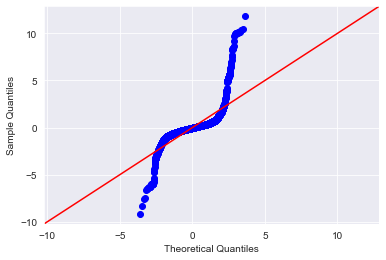

In [20]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

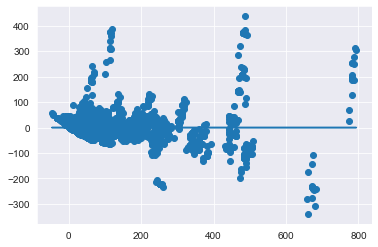

In [21]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train_df[x_cols]), model.resid)
plt.plot(model.predict(train_df[x_cols]), [0 for i in range(len(train_df))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

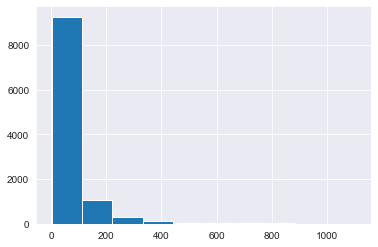

In [22]:
# Your code here - Check for outliers
df.list_price.hist()

In [23]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [ ]:
# # Your code here
# # Remove extreme outliers
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

In [26]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = y + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

# # Rerun the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     446.2
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:28:37   Log-Likelihood:                -5211.0
No. Observations:                8067   AIC:                         1.053e+04
Df Residuals:                    8015   BIC:                         1.089e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4792      0.013    259.936      0.000       3.453       3.505
piece_count                                          0.6393      0.011     60.787      0.000       0.619       0.660
num_reviews                                          0.0010      0.009      0.113      0.910      -0.016       0.018
play_star_rating                                     0.1070      0.006     17.166      0.000       0.095       0.119
val_star_rating                                     -0.1555      0.006    -24.796      0.000      -0.168      -0.143
ages_11_16                                           0.0738      0.072      1.030      0.303      -0.067       0.214
ages_12_16                                          -0.2118      0.087     -2.428      0.015      -0.383      -0.041
ages_14plus                                          0.2084      0.053      3.938      0.000       0.105       0.312
ages_2_5                                             0.4178      0.023     18.566      0.000       0.374       0.462
ages_4plus                                          -1.3440      0.118    -11.355      0.000      -1.576      -1.112
ages_5_12                                           -0.7132      0.033    -21.872      0.000      -0.777      -0.649
ages_6plus                                          -0.9454      0.069    -13.715      0.000      -1.081      -0.810
ages_6_12                                           -0.2104      0.019    -11.059      0.000      -0.248      -0.173
ages_7_12                                            0.0167      0.025      0.674      0.500      -0.032       0.065
ages_7_14                                           -0.0482      0.021     -2.338      0.019      -0.089      -0.008
ages_8plus                                           0.5330      0.056      9.546      0.000       0.424       0.642
ages_8_12                                            0.1499      0.032      4.696      0.000       0.087       0.212
ages_8_14                                            0.2173      0.021     10.427      0.000       0.176       0.258
ages_9plus                                           0.2614      0.132      1.976      0.048       0.002       0.521
ages_9_12                                            0.2779      0.087      3.189      0.001       0.107       0.449
theme_name_BOOST                                     0.9735      0.113      8.606      0.000       0.752       1.195
theme_name_Blues_Helicopter_Pursuit                  0.6933      0.115      6.042      0.000       0.468       0.918
theme_name_Carnotaurus_Gyrosphere_Escape             1.0690      0.115      9.308      0.000       0.844       1.294
theme_name_City                          

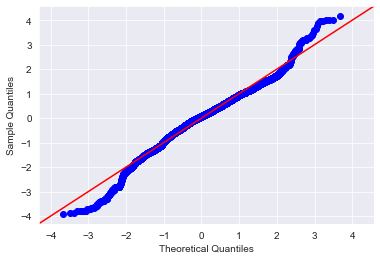

In [27]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

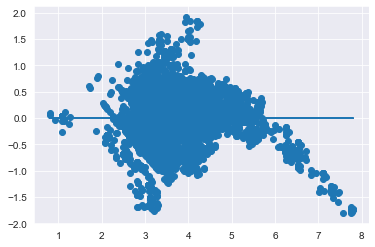

In [30]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


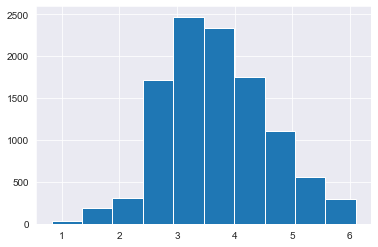

In [31]:
# Your code goes here
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [33]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = y + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     454.0
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:32:24   Log-Likelihood:                -5005.3
No. Observations:                8027   AIC:                         1.011e+04
Df Residuals:                    7975   BIC:                         1.048e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.5176      0.013    264.054      0.000       3.491       3.544
piece_count                                          0.6776      0.011     61.890      0.000       0.656       0.699
num_reviews                                          0.0278      0.008      3.375      0.001       0.012       0.044
play_star_rating                                     0.1108      0.006     18.252      0.000       0.099       0.123
val_star_rating                                     -0.1554      0.006    -25.407      0.000      -0.167      -0.143
ages_11_16                                           0.0010      0.072      0.014      0.989      -0.140       0.142
ages_12_16                                          -0.2506      0.088     -2.851      0.004      -0.423      -0.078
ages_14plus                                          0.0193      0.054      0.361      0.718      -0.086       0.124
ages_2_5                                             0.4064      0.022     18.339      0.000       0.363       0.450
ages_4plus                                          -1.4565      0.127    -11.476      0.000      -1.705      -1.208
ages_5_12                                           -0.7853      0.032    -24.633      0.000      -0.848      -0.723
ages_6plus                                          -1.0587      0.070    -15.059      0.000      -1.196      -0.921
ages_6_12                                           -0.2597      0.019    -13.713      0.000      -0.297      -0.223
ages_7_12                                           -0.0015      0.025     -0.061      0.951      -0.050       0.047
ages_7_14                                           -0.0708      0.020     -3.467      0.001      -0.111      -0.031
ages_8plus                                           0.5467      0.054     10.047      0.000       0.440       0.653
ages_8_12                                            0.1166      0.031      3.791      0.000       0.056       0.177
ages_8_14                                            0.1903      0.020      9.382      0.000       0.151       0.230
ages_9plus                                           0.2998      0.130      2.307      0.021       0.045       0.555
ages_9_12                                            0.2355      0.083      2.847      0.004       0.073       0.398
theme_name_BOOST                                     0.9132      0.125      7.330      0.000       0.669       1.157
theme_name_Blues_Helicopter_Pursuit                  0.7058      0.112      6.285      0.000       0.486       0.926
theme_name_Carnotaurus_Gyrosphere_Escape             1.0498      0.112      9.340      0.000       0.829       1.270
theme_name_City                          

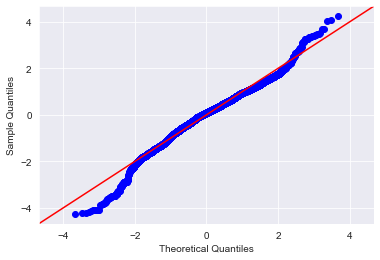

In [34]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

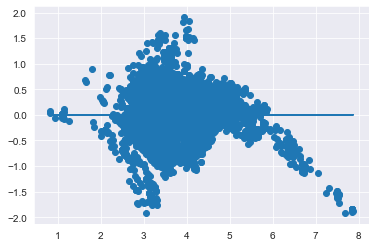

In [35]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 